<a href="https://colab.research.google.com/github/FarizHadi/Image-Enhancement---Low-Contrast-Issue/blob/main/CVL_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

array([[[133, 124, 125],
        [133, 124, 125],
        [133, 124, 125],
        ...,
        [103, 110, 118],
        [103, 110, 118],
        [103, 110, 118]],

       [[133, 124, 125],
        [133, 124, 125],
        [133, 124, 125],
        ...,
        [103, 110, 118],
        [103, 110, 118],
        [103, 110, 118]],

       [[133, 124, 125],
        [133, 124, 125],
        [133, 124, 125],
        ...,
        [103, 110, 118],
        [103, 110, 118],
        [103, 110, 118]],

       ...,

       [[121, 123, 135],
        [121, 123, 135],
        [121, 123, 135],
        ...,
        [121, 123, 135],
        [121, 123, 135],
        [121, 123, 135]],

       [[121, 123, 135],
        [121, 123, 135],
        [121, 123, 135],
        ...,
        [120, 122, 134],
        [120, 122, 134],
        [120, 122, 134]],

       [[121, 123, 135],
        [121, 123, 135],
        [121, 123, 135],
        ...,
        [120, 122, 134],
        [120, 122, 134],
        [120, 122, 134]]], dtype=uint8)
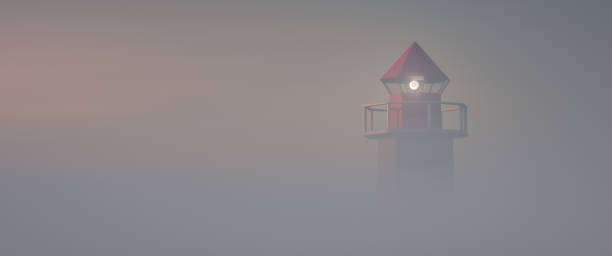

In [2]:
import cv2
import matplotlib.pyplot as plt

img_path = "/-/sinyal suar berkabut.jpg"

# Baca gambar dalam grayscale
img = cv2.imread(img_path) #
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV default BGR → ubah ke RGB biar sesuai plt

img

In [3]:
# Cek ukuran dan tipe data
print(img.shape, img.dtype)

(256, 612, 3) uint8


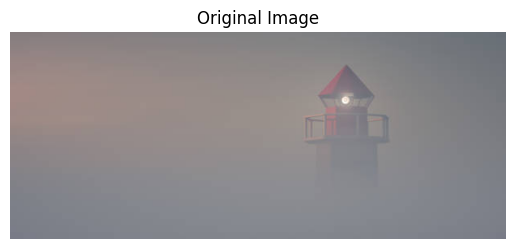

In [4]:
# Plot gambar
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

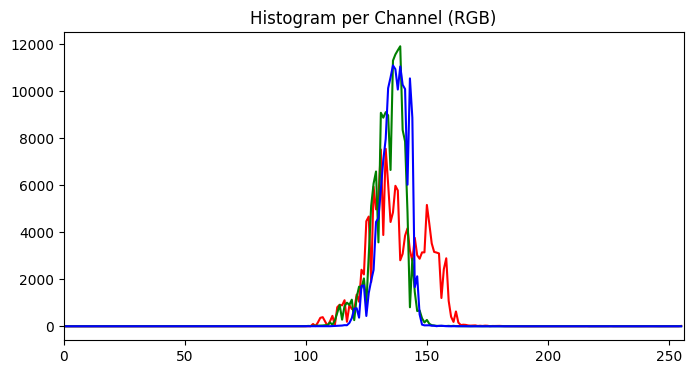

In [5]:
# Hitung histogram tiap channel
color = ('r','g','b')
plt.figure(figsize=(8,4))
for i,col in enumerate(color):
    hist = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist, color = col)
    plt.xlim([0,256])
plt.title("Histogram per Channel (RGB)")
plt.show()

#### Insights dari Histogram :
  Jika dilihat dari Histogram setiap Channel terlihat nilai rentang sempit dan berkumpul ditengah sehingga mengindikasikan Low-Contrast.

### Konversi ke grey scale

Disini kita konversi ke grey scale agar menjadi 1 channel diterapkan Histogram Equalization.

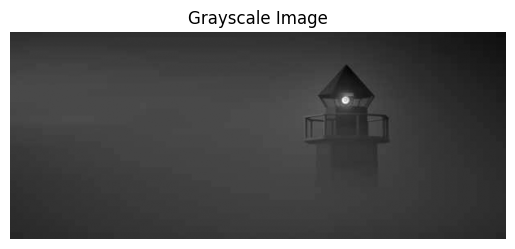

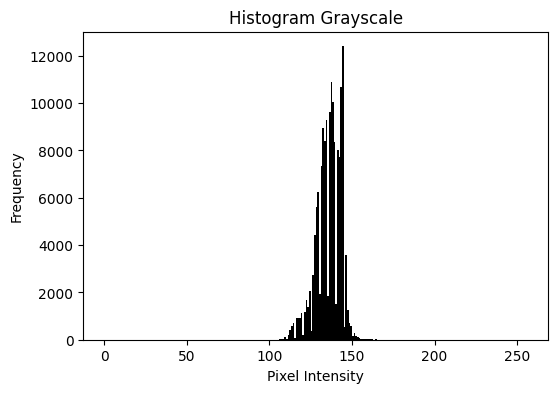

In [6]:
# --- Konversi ke grayscale ---
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Tampilkan grayscale image
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Histogram grayscale
plt.figure(figsize=(6,4))
plt.hist(gray.ravel(), bins=256, range=(0,256), color='black')
plt.title("Histogram Grayscale")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

### Metode 1 : Global Histogram Equalization

Menyebarkan distribusi intensitas ke seluruh rentang (0–255) secara keseluruhan.

In [7]:
# Global Histogram Equalization
he_global = cv2.equalizeHist(gray)

### Metode 2 : CLAHE (Contrast Limited Adaptive Histogram Equalization)

Bagi gambar ke blok kecil, lakukan equalization tiap blok, lalu gabungkan hasilnya.

In [8]:
# CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
he_clahe = clahe.apply(gray)

### Hasil

/tmp/ipython-input-760347955.py:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1,0].hist(gray.ravel(), 256, [0,256]); axes[1,0].set_title("Hist Original")
/tmp/ipython-input-760347955.py:9: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1,1].hist(he_global.ravel(), 256, [0,256]); axes[1,1].set_title("Hist Global HE")
/tmp/ipython-input-760347955.py:10: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1,2].hist(he_clahe.ravel(), 256, [0,256]); axes[1,2].set_title("Hist CLAHE")


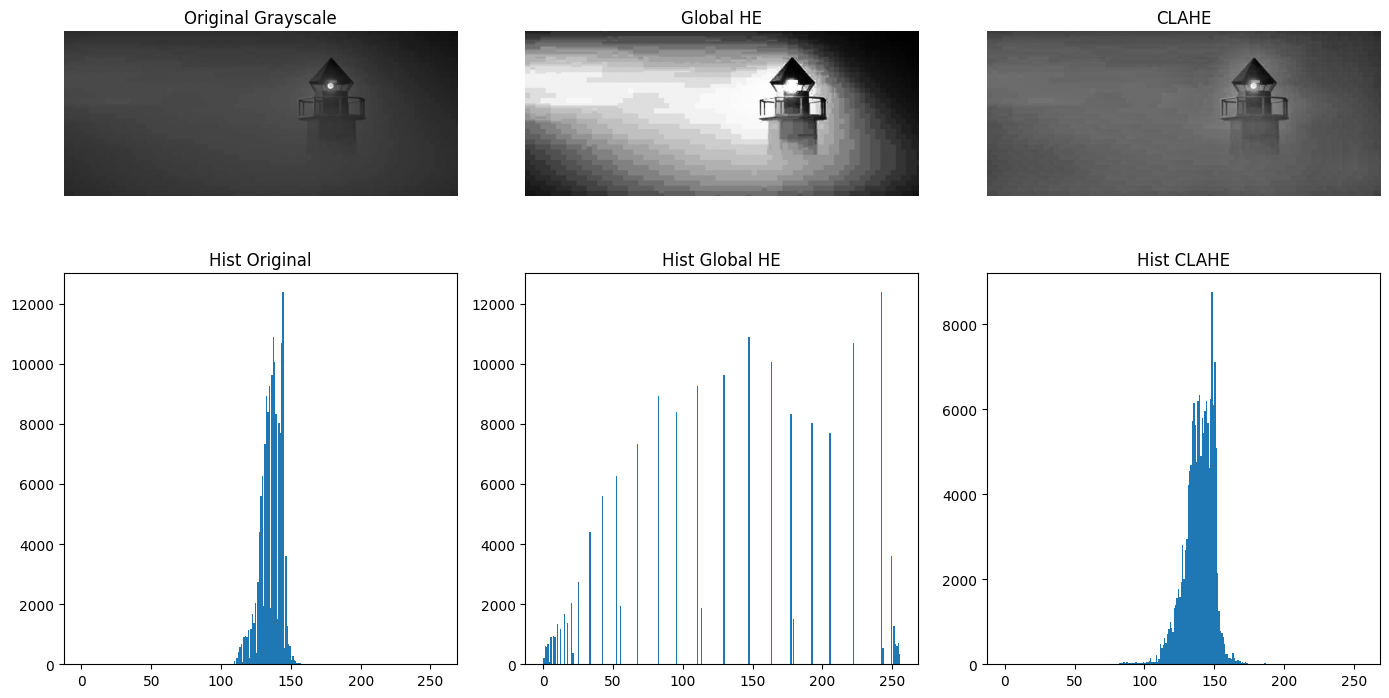

In [9]:
# Plot hasil perbandingan
fig, axes = plt.subplots(2,3, figsize=(14,8))

axes[0,0].imshow(gray, cmap='gray'); axes[0,0].set_title("Original Grayscale"); axes[0,0].axis("off")
axes[0,1].imshow(he_global, cmap='gray'); axes[0,1].set_title("Global HE"); axes[0,1].axis("off")
axes[0,2].imshow(he_clahe, cmap='gray'); axes[0,2].set_title("CLAHE"); axes[0,2].axis("off")

axes[1,0].hist(gray.ravel(), 256, [0,256]); axes[1,0].set_title("Hist Original")
axes[1,1].hist(he_global.ravel(), 256, [0,256]); axes[1,1].set_title("Hist Global HE")
axes[1,2].hist(he_clahe.ravel(), 256, [0,256]); axes[1,2].set_title("Hist CLAHE")

plt.tight_layout()
plt.show()

### Pembahasan



*   **Hasil dari global HE** memang me-mapping ulang nilai intensitas sebelum HE ke nilai intensitas yang baru (setelah HE) sehingga nilai memiliki rentang yang lebih luas menjadi rentang 0-255 dari yang sebelumnya rentang 120-150. Namun masi memiliki kekurangan yaitu nilai intensitas yang awalnya berdekatan menjadi berjauhan karena adanya konsep CDF, sehingga perbedaan area atau transisi area di gambar jadi terlihat kasar. **Sehingga, alurnya adalah (1) Dapatkan frekuensi pixel per level intensitas, (2) Mapping ke Perhitungan CDF, (3) Didapatkan Nilai intensitas baru untuk setiap pixel.**
*   **Hasil dari CLAHE** melakukan mapping ulang juga, namun perbedaannya terletak pada bagaimana CLAHE menghitung histogram lokal + batasi dengan **clipLimit**. Konsep clipLimit (membatasi tinggi histogram) + Lokal tile (agar kontras disesuaikan sesuai konteks lokal, bukan rata-rata global.) + Interpolasi antar-tile (agar tidak muncul garis batas antar blok). **Sehingga, alurnya adalah (1) Dapatkan frekuensi pixel per level intensitas, (2) Tentukan clip limit, (3) Bangun CDF per tile (sama ide dengan HE, tapi pakai histogram yang sudah di-clip dan per tile).**



### Penerapan Histogram Equalization tanpa OpenCV

/tmp/ipython-input-2095732847.py:34: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.flatten(), 256, [0,256], color='blue')
/tmp/ipython-input-2095732847.py:38: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_he.flatten(), 256, [0,256], color='green')


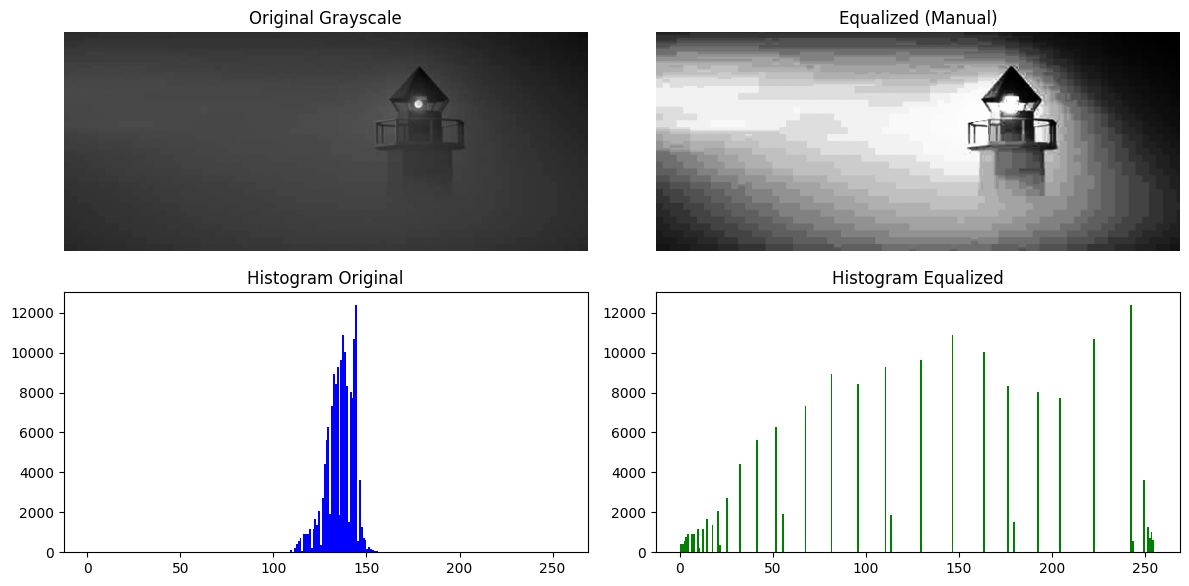

In [10]:
import numpy as np

# 1. Baca gambar (grayscale)
img = cv2.imread("/-/sinyal suar berkabut.jpg", cv2.IMREAD_GRAYSCALE)

# 2. Hitung histogram
hist, bins = np.histogram(img.flatten(), 256, [0,256])

# 3. Hitung CDF (cumulative distribution function)
cdf = hist.cumsum()

# normalisasi supaya tidak ada nilai nol di awal
cdf_min = cdf[cdf > 0].min()
cdf_normalized = (cdf - cdf_min) * 255 / (cdf[-1] - cdf_min)
cdf_normalized = cdf_normalized.astype('uint8')  # buat LUT (lookup table)

# 4. Mapping (setiap pixel diganti dengan nilai baru dari LUT)
img_he = cdf_normalized[img]

# 5. Visualisasi
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(img_he, cmap='gray')
plt.title("Equalized (Manual)")
plt.axis("off")

plt.subplot(2,2,3)
plt.hist(img.flatten(), 256, [0,256], color='blue')
plt.title("Histogram Original")

plt.subplot(2,2,4)
plt.hist(img_he.flatten(), 256, [0,256], color='green')
plt.title("Histogram Equalized")

plt.tight_layout()
plt.show()
